# Prototype Rest Ref in Theano

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 60,60,60],
                         path_o = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

In [3]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
35,1900.0,1000.0,-800.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},2}$",5
36,900.0,1000.0,-650.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},3}$",5
37,600.0,1000.0,-550.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
38,1300.0,1000.0,-600.0,SecondaryReservoir,Default series,5,1,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
39,0.0,0.0,-2000.0,basement,Default series,6,1,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [4]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying'), 
                               },
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 


In [5]:
geo_data.interfaces.tail()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
35,1600.0,1000.0,-1500.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},4}$",5
36,1750.0,1000.0,-1550.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},5}$",5
37,1000.0,1000.0,-1300.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},6}$",5
38,1900.0,1000.0,-1600.0,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},7}$",5
39,0.0,0.0,-2000.0,basement,Rest,6,2,False,"${\bf{x}}_{\alpha \,{\bf{6}},0}$",6


In [6]:
gp.get_series(geo_data)

,fault,Rest
0,MainFault,SecondaryReservoir
1,NaN,Seal
2,NaN,Reservoir
3,NaN,Overlying
4,NaN,basement


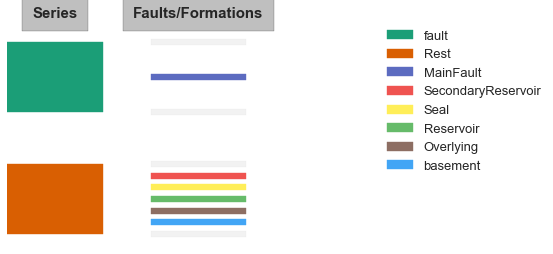

In [7]:
gp.get_sequential_pile(geo_data)

/opt/conda/lib/python3.6/site-packages/gempy/gempy_front.py:861: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


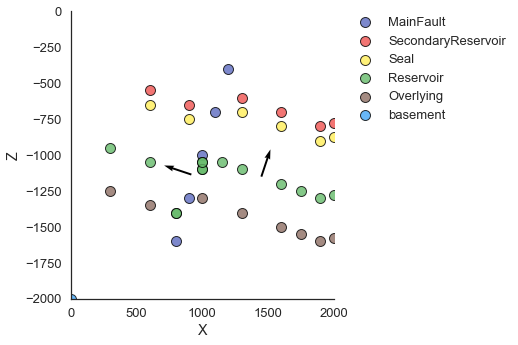

In [8]:
gp.plot_data(geo_data)

In [9]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True, u_grade=[0,1])

Compiling theano function...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [10]:
inter = interp_data.interpolator

## <a href='#summary'><span style="color:red">Jump to Theano Summary</span></a> 

## ref & res point separation in Pandas

In [11]:
inter.geo_data_res_no_basement.interfaces

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,0.4751,0.503225,0.47510,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.5251,0.503225,0.62510,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,0.5501,0.503225,0.70010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,0.4501,0.503225,0.40010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
6,0.6501,0.503225,0.62510,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2
7,0.7251,0.503225,0.60010,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",2
8,0.4751,0.503225,0.63760,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",2
9,0.4001,0.503225,0.66260,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},4}$",2


In [12]:
# First: length of interface in principle could stay in python
inter.len_interfaces

array([ 5,  6,  6, 14,  8])

In [13]:
inter.set_length_interface??

In [14]:
# Second find the reference position

In [15]:
inter.ref_position

array([ 0,  5, 11, 17, 31])

In [16]:
inter.set_ref_position??

In [17]:
# Third extract the values without the references

In [18]:
inter.pandas_rest_layer_points.head()

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
1,0.4751,0.503225,0.4751,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.5251,0.503225,0.6251,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,0.5501,0.503225,0.7001,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,0.4501,0.503225,0.4001,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
6,0.6501,0.503225,0.6251,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",2


In [19]:
inter.set_layers_rest??

In [20]:
# Forth extract the ref and append as many times as lenth of interce. This is the fucked up one

In [21]:
inter.pandas_ref_layer_points

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
11,0.4001,0.503225,0.63760,Seal,Rest,3,2,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3
17,0.5001,0.746975,0.53760,Reservoir,Rest,4,2,False,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",4
31,0.4001,0.503225,0.46260,Overlying,Rest,5,2,False,"${\bf{x}}_{\alpha \,{\bf{5}},0}$",5


In [22]:
inter.pandas_ref_layer_points_rep

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
11,0.4001,0.503225,0.63760,Seal,Rest,3,2,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3


In [23]:
inter.set_layers_ref??

## ref & res point separation in  Theano

In [69]:
import theano.tensor as tt
import theano as t

In [70]:
# First: length of interface in principle could stay in python
inter.len_interfaces

array([ 5,  6,  6, 14,  8])

In [71]:
# Second: find the reference position
inter.ref_position

array([ 0,  5, 11, 17, 31])

In [72]:
# instantiate Theano tensors
points = tt.dmatrix('points') # float64
ref_points = tt.dmatrix('ref_points')
ref_points_prop = tt.dmatrix('ref_points_prop')
res_points = tt.dmatrix('res_points')


# convert len and pos into theano shared variables
len_if = t.shared(inter.len_interfaces)
ref_pos = t.shared(inter.ref_position)

In [73]:
# check datatype of shared variables
len_if

<TensorType(int64, vector)>

#### A) Extract ref points

In [74]:
# HowTo in Pandas
# self.pandas_ref_layer_points = self.geo_data_res_no_basement.interfaces.iloc[self.ref_position]

In [75]:
# create expression / graph for slicing ref

#ref_points = points[ref_pos]
ref_points = points[inter.ref_position]

# --> both options - shared theano variable and numpy array seem to work as indices

In [76]:
# create theano function
# ref_res = theano.function([points, len_if, ref_pos], [ref_points, res_points])
calc_ref = t.function([points], [ref_points])

# calculate ref points
calc_ref(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values)

[array([[0.5001  , 0.503225, 0.5501  ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.4001  , 0.503225, 0.4626  ]])]

In [77]:
# compare results
inter.pandas_ref_layer_points.loc[:,['X','Y','Z']].values

array([[0.5001  , 0.503225, 0.5501  ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.4001  , 0.503225, 0.4626  ]])

In [78]:
np.prod(calc_ref(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values) == inter.pandas_ref_layer_points.loc[:,['X','Y','Z']].values)

1

#### B) Propagate/Replicate ref points

In [79]:
# HowTo in Pandas
# pandas_ref_layer_points_rep = self.pandas_ref_layer_points.apply(lambda x: np.repeat(x, self.len_interfaces - 1))

# the lambda function
#r = lambda x: np.repeat(x, inter.len_interfaces - 1)
#def roll (x):
#    np.repeat(x, inter.len_interfaces - 1)

inter.pandas_ref_layer_points.apply(lambda x: np.repeat(x, inter.len_interfaces - 1))

,X,Y,Z,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
0,0.5001,0.503225,0.55010,MainFault,fault,1,1,True,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
5,0.7501,0.503225,0.60635,SecondaryReservoir,Rest,2,2,False,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",2
11,0.4001,0.503225,0.63760,Seal,Rest,3,2,False,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",3


In [122]:
# create expression / graph for propagating ref
ref_points_prop = tt.repeat(ref_points, (inter.len_interfaces - 1), axis=0)

In [125]:
inter.len_interfaces - 1

array([ 4,  5,  5, 13,  7])

In [124]:
# create theano function
calc_ref_prop = t.function([points], [ref_points_prop])

# calculate ref_prop points
calc_ref_prop(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values)

[array([[0.5001  , 0.503225, 0.5501  ],
        [0.5001  , 0.503225, 0.5501  ],
        [0.5001  , 0.503225, 0.5501  ],
        [0.5001  , 0.503225, 0.5501  ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.7501  , 0.503225, 0.60635 ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.4001  , 0.503225, 0.6376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],
        [0.5001  , 0.746975, 0.5376  ],


In [120]:
# compare results
inter.pandas_ref_layer_points_rep.loc[:,['X','Y','Z']].values

array([[0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.74697

In [126]:
np.prod(calc_ref_prop(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values) == inter.pandas_ref_layer_points_rep.loc[:,['X','Y','Z']].values)

1

#### C) Slice res points

In [127]:
# HowTo in Pandas
#try:
#    self.pandas_rest_layer_points = self.geo_data_res_no_basement.interfaces.drop(self.ref_position)
#except ValueError:
#    raise ValueError('It is necessary at least one point per layer to be able to compile')

# maybe with boolean index?

In [128]:
res_mask = np.ones(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values.shape[0], dtype=bool)
res_mask[inter.ref_position] = 0
res_mask

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [129]:
# create expression / graph for slicing res
res_points = points[res_mask]

In [130]:
# create theano function
calc_res = t.function([points], [res_points])

# calculate res points
calc_res(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values)

[array([[0.4751  , 0.503225, 0.4751  ],
        [0.5251  , 0.503225, 0.6251  ],
        [0.5501  , 0.503225, 0.7001  ],
        [0.4501  , 0.503225, 0.4001  ],
        [0.6501  , 0.503225, 0.6251  ],
        [0.7251  , 0.503225, 0.6001  ],
        [0.4751  , 0.503225, 0.6376  ],
        [0.4001  , 0.503225, 0.6626  ],
        [0.5751  , 0.503225, 0.6501  ],
        [0.5751  , 0.503225, 0.6251  ],
        [0.6501  , 0.503225, 0.6001  ],
        [0.4751  , 0.503225, 0.6126  ],
        [0.7501  , 0.503225, 0.58135 ],
        [0.7251  , 0.503225, 0.5751  ],
        [0.5001  , 0.728225, 0.5251  ],
        [0.5376  , 0.503225, 0.5376  ],
        [0.5001  , 0.278225, 0.5251  ],
        [0.5001  , 0.259475, 0.5376  ],
        [0.5751  , 0.503225, 0.5251  ],
        [0.6501  , 0.503225, 0.5001  ],
        [0.4501  , 0.303225, 0.4501  ],
        [0.4501  , 0.703225, 0.4501  ],
        [0.4001  , 0.503225, 0.5376  ],
        [0.3251  , 0.503225, 0.5626  ],
        [0.7501  , 0.503225, 0.48135 ],


In [131]:
# compare results
inter.pandas_rest_layer_points.loc[:,['X','Y','Z']].values

array([[0.4751  , 0.503225, 0.4751  ],
       [0.5251  , 0.503225, 0.6251  ],
       [0.5501  , 0.503225, 0.7001  ],
       [0.4501  , 0.503225, 0.4001  ],
       [0.6501  , 0.503225, 0.6251  ],
       [0.7251  , 0.503225, 0.6001  ],
       [0.4751  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6626  ],
       [0.5751  , 0.503225, 0.6501  ],
       [0.5751  , 0.503225, 0.6251  ],
       [0.6501  , 0.503225, 0.6001  ],
       [0.4751  , 0.503225, 0.6126  ],
       [0.7501  , 0.503225, 0.58135 ],
       [0.7251  , 0.503225, 0.5751  ],
       [0.5001  , 0.728225, 0.5251  ],
       [0.5376  , 0.503225, 0.5376  ],
       [0.5001  , 0.278225, 0.5251  ],
       [0.5001  , 0.259475, 0.5376  ],
       [0.5751  , 0.503225, 0.5251  ],
       [0.6501  , 0.503225, 0.5001  ],
       [0.4501  , 0.303225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4001  , 0.503225, 0.5376  ],
       [0.3251  , 0.503225, 0.5626  ],
       [0.7501  , 0.503225, 0.48135 ],
       [0.7251  , 0.50322

In [132]:
np.prod(calc_res(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values) == inter.pandas_rest_layer_points.loc[:,['X','Y','Z']].values)

1

<a id='summary'></a>
#### D) Combine methods / Summary

It is not necessary to create shared Theano variables of `inter.ref_position` and `inter.len_interfaces`, bacause Theano accepts numpy arrays for slicing and parameters!

In [20]:
import theano.tensor as tt
import theano as t

In [21]:
# instantiate Theano tensors

points = tt.dmatrix('points') # float64
#ref_points_ind = tt.dmatrix('ref_points')
ref_points = tt.dmatrix('ref_points')
res_points = tt.dmatrix('res_points')

In [22]:
# create expression/graph for slicing and repeating ref and slicing res

# individual ref points
#ref_points_ind = points[inter.ref_position
#ref_points = tt.repeat(ref_points_ind, (inter.len_interfaces - 1), axis=0)

ref_points = tt.repeat(points[inter.ref_position], (inter.len_interfaces - 1), axis=0)

# mask inverse of ref points in numpy
res_mask = np.ones(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values.shape[0], dtype=bool)
res_mask[inter.ref_position] = 0

res_points = points[res_mask]

In [23]:
# create theano separation function

sep_ref_res = t.function([points], [ref_points, res_points])

In [24]:
# calculate res and ref points

ref, res = sep_ref_res(inter.geo_data_res_no_basement.interfaces[['X','Y','Z']].values)

In [25]:
res

array([[0.4751  , 0.503225, 0.4751  ],
       [0.5251  , 0.503225, 0.6251  ],
       [0.5501  , 0.503225, 0.7001  ],
       [0.4501  , 0.503225, 0.4001  ],
       [0.6501  , 0.503225, 0.6251  ],
       [0.7251  , 0.503225, 0.6001  ],
       [0.4751  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6626  ],
       [0.5751  , 0.503225, 0.6501  ],
       [0.5751  , 0.503225, 0.6251  ],
       [0.6501  , 0.503225, 0.6001  ],
       [0.4751  , 0.503225, 0.6126  ],
       [0.7501  , 0.503225, 0.58135 ],
       [0.7251  , 0.503225, 0.5751  ],
       [0.5001  , 0.728225, 0.5251  ],
       [0.5376  , 0.503225, 0.5376  ],
       [0.5001  , 0.278225, 0.5251  ],
       [0.5001  , 0.259475, 0.5376  ],
       [0.5751  , 0.503225, 0.5251  ],
       [0.6501  , 0.503225, 0.5001  ],
       [0.4501  , 0.303225, 0.4501  ],
       [0.4501  , 0.703225, 0.4501  ],
       [0.4001  , 0.503225, 0.5376  ],
       [0.3251  , 0.503225, 0.5626  ],
       [0.7501  , 0.503225, 0.48135 ],
       [0.7251  , 0.50322

In [26]:
ref

array([[0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.5001  , 0.503225, 0.5501  ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.7501  , 0.503225, 0.60635 ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.4001  , 0.503225, 0.6376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.746975, 0.5376  ],
       [0.5001  , 0.74697

In [27]:
# check ref points match
np.prod(ref == inter.pandas_ref_layer_points_rep.loc[:,['X','Y','Z']].values)

1

In [28]:
# check res points match
np.prod(res == inter.pandas_rest_layer_points.loc[:,['X','Y','Z']].values)

1

## Visualization

In [10]:
sol = gp.compute_model(interp_data)

../../gempy/gempy_front.py:953: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


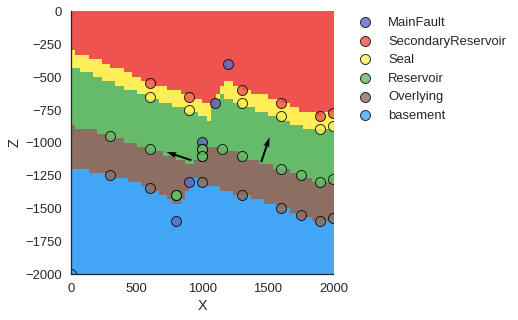

In [7]:
gp.plot_section(geo_data, sol[0][0], 30, plot_data=True)

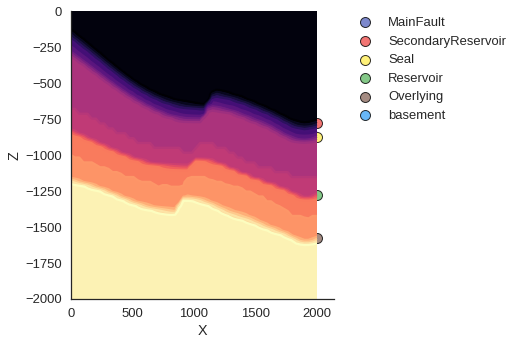

In [27]:
gp.plot_scalar_field(geo_data, sol[0][0], 30)

In [29]:
ver, sim = gp.get_surfaces(interp_data, sol[0][1], sol[1][1])

In [30]:
gp.plot_surfaces_3D(geo_data, ver, sim)